In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ahu18 = pd.read_csv('AHU_18.csv',low_memory=False)
ahu18 = ahu18.ffill()
ahu18.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16
0,31-12-2015,00:00:00,OFF,1.9,73.2,OFF,73.4,0.0,71.3,73.6,20.0,75.3,20,0.09,70,63
1,31-12-2015,00:02:42,OFF,1.9,73.2,OFF,73.4,0.0,71.3,73.6,20.0,75.3,20,0.09,70,63
2,31-12-2015,00:03:20,OFF,1.9,73.2,OFF,73.4,0.0,71.3,73.6,20.0,75.3,20,0.09,70,63
3,31-12-2015,00:03:36,OFF,1.9,73.2,OFF,73.4,0.0,71.3,73.6,20.0,75.3,20,0.09,70,63
4,31-12-2015,00:04:05,OFF,1.9,73.2,OFF,73.4,0.0,71.3,73.6,20.0,75.3,20,0.09,70,63


In [3]:
ahu18.rename(columns={'Column1':'Date','Column2':'Time','Column3':'Supply fan ON?OFF','Column5':'Cold Deck temperature',
                      'Column6':'exhaust fans ON?OFF','Column7':'Hot Deck temperature','Column8':'Mixed Air damper %open',
                      'Column9':'Mixed air temperature','Column10':'Pre-heat coil discharger temperature','Column11':'Pre-heat coil discharger valve',
                      'Column12':'Return air temperature','Column13':'Return air valve','Column4':'Cooling coil valve %open',
                      'Column14':'supply static pressure','Column15':'Supply fan VFD speed', 'Column16':'Return fan VFD speed'},inplace = True)
ahu18.head()

,Date,Time,Supply fan ON?OFF,Cooling coil valve %open,Cold Deck temperature,exhaust fans ON?OFF,Hot Deck temperature,Mixed Air damper %open,Mixed air temperature,Pre-heat coil discharger temperature,Pre-heat coil discharger valve,Return air temperature,Return air valve,supply static pressure,Supply fan VFD speed,Return fan VFD speed
0,31-12-2015,00:00:00,OFF,1.9,73.2,OFF,73.4,0.0,71.3,73.6,20.0,75.3,20,0.09,70,63
1,31-12-2015,00:02:42,OFF,1.9,73.2,OFF,73.4,0.0,71.3,73.6,20.0,75.3,20,0.09,70,63
2,31-12-2015,00:03:20,OFF,1.9,73.2,OFF,73.4,0.0,71.3,73.6,20.0,75.3,20,0.09,70,63
3,31-12-2015,00:03:36,OFF,1.9,73.2,OFF,73.4,0.0,71.3,73.6,20.0,75.3,20,0.09,70,63
4,31-12-2015,00:04:05,OFF,1.9,73.2,OFF,73.4,0.0,71.3,73.6,20.0,75.3,20,0.09,70,63


In [4]:
ahu18['Return air temperature'] = pd.to_numeric(ahu18['Return air temperature'],errors='coerce')
ahu18['Pre-heat coil discharger temperature'] = pd.to_numeric(ahu18['Pre-heat coil discharger temperature'],errors='coerce')
ahu18['Mixed Air damper %open'] = pd.to_numeric(ahu18['Mixed Air damper %open'],errors='coerce')
ahu18['Cooling coil valve %open'] = pd.to_numeric(ahu18['Cooling coil valve %open'],errors='coerce')
ahu18['Pre-heat coil discharger valve'] = pd.to_numeric(ahu18['Pre-heat coil discharger valve'],errors='coerce')
ahu18['supply static pressure'] = pd.to_numeric(ahu18['supply static pressure'],errors='coerce')
ahu18['Supply fan VFD speed'] = pd.to_numeric(ahu18['Supply fan VFD speed'],errors='coerce')
ahu18['Return fan VFD speed'] = pd.to_numeric(ahu18['Return fan VFD speed'],errors='coerce')
ahu18['Return air valve'] = pd.to_numeric(ahu18['Return air valve'],errors='coerce')
ahu18 = ahu18.ffill()

In [5]:
sup_on = ahu18[ahu18['Supply fan ON?OFF'].str.contains('ON')]
sup_off = ahu18[ahu18['Supply fan ON?OFF'].str.contains('OFF')]
data_temp = [ahu18['Cold Deck temperature'],ahu18['Hot Deck temperature'],ahu18['Mixed air temperature'],
             ahu18['Pre-heat coil discharger temperature'],
             ahu18['Return air temperature']]
data_temp_1 = [sup_on['Cold Deck temperature'],sup_on['Hot Deck temperature'],sup_on['Mixed air temperature'],
               sup_on['Pre-heat coil discharger temperature'],
               sup_on['Return air temperature']]
data_temp_2 = [sup_off['Cold Deck temperature'],sup_off['Hot Deck temperature'],sup_off['Mixed air temperature'],
               sup_off['Pre-heat coil discharger temperature'],
               sup_off['Return air temperature']]

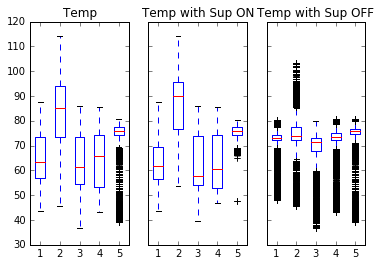

In [6]:
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharey = True)
ax1.boxplot(data_temp)
ax1.set_title('Temp')
ax2.boxplot(data_temp_1)
ax2.set_title('Temp with Sup ON')
ax3.boxplot(data_temp_2)
ax3.set_title('Temp with Sup OFF')
#plt.show()
plt.savefig(''.join(['Temp','_ahu18']))

In [6]:

data_value = [ahu18['Mixed Air damper %open'],ahu18['Pre-heat coil discharger valve'],ahu18['Return air valve'],
              ahu18['Cooling coil valve %open'],ahu18['supply static pressure'],ahu18['Supply fan VFD speed'],
              ahu18['Return fan VFD speed']]
data_value_1 = [sup_on['Mixed Air damper %open'],sup_on['Pre-heat coil discharger valve'],sup_on['Return air valve'],
                sup_on['Cooling coil valve %open'],sup_on['supply static pressure'],sup_on['Supply fan VFD speed'],
                sup_on['Return fan VFD speed']]
data_value_2 = [sup_off['Mixed Air damper %open'],sup_off['Pre-heat coil discharger valve'],sup_off['Return air valve'],
                sup_off['Cooling coil valve %open'],sup_off['supply static pressure'],sup_off['Supply fan VFD speed'],
                sup_off['Return fan VFD speed']]

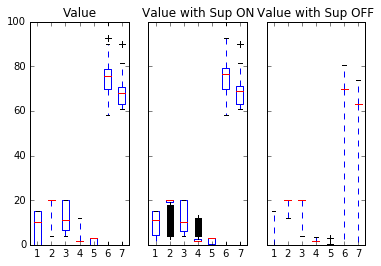

In [8]:
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharey = True)
ax1.boxplot(data_value)
ax1.set_title('Value')
ax2.boxplot(data_value_1)
ax2.set_title('Value with Sup ON')
ax3.boxplot(data_value_2)
ax3.set_title('Value with Sup OFF')
#plt.show()
plt.savefig(''.join(['Value','_ahu18']))

In [9]:
df1 = ahu18.copy()
df1 = df1.drop(['Date','Time','Supply fan ON?OFF','exhaust fans ON?OFF'],1)
ahu18.columns.values

array(['Date', 'Time', 'Supply fan ON?OFF', 'Cooling coil valve %open',
       'Cold Deck temperature', 'exhaust fans ON?OFF',
       'Hot Deck temperature', 'Mixed Air damper %open',
       'Mixed air temperature', 'Pre-heat coil discharger temperature',
       'Pre-heat coil discharger valve', 'Return air temperature',
       'Return air valve', 'supply static pressure',
       'Supply fan VFD speed', 'Return fan VFD speed'], dtype=object)

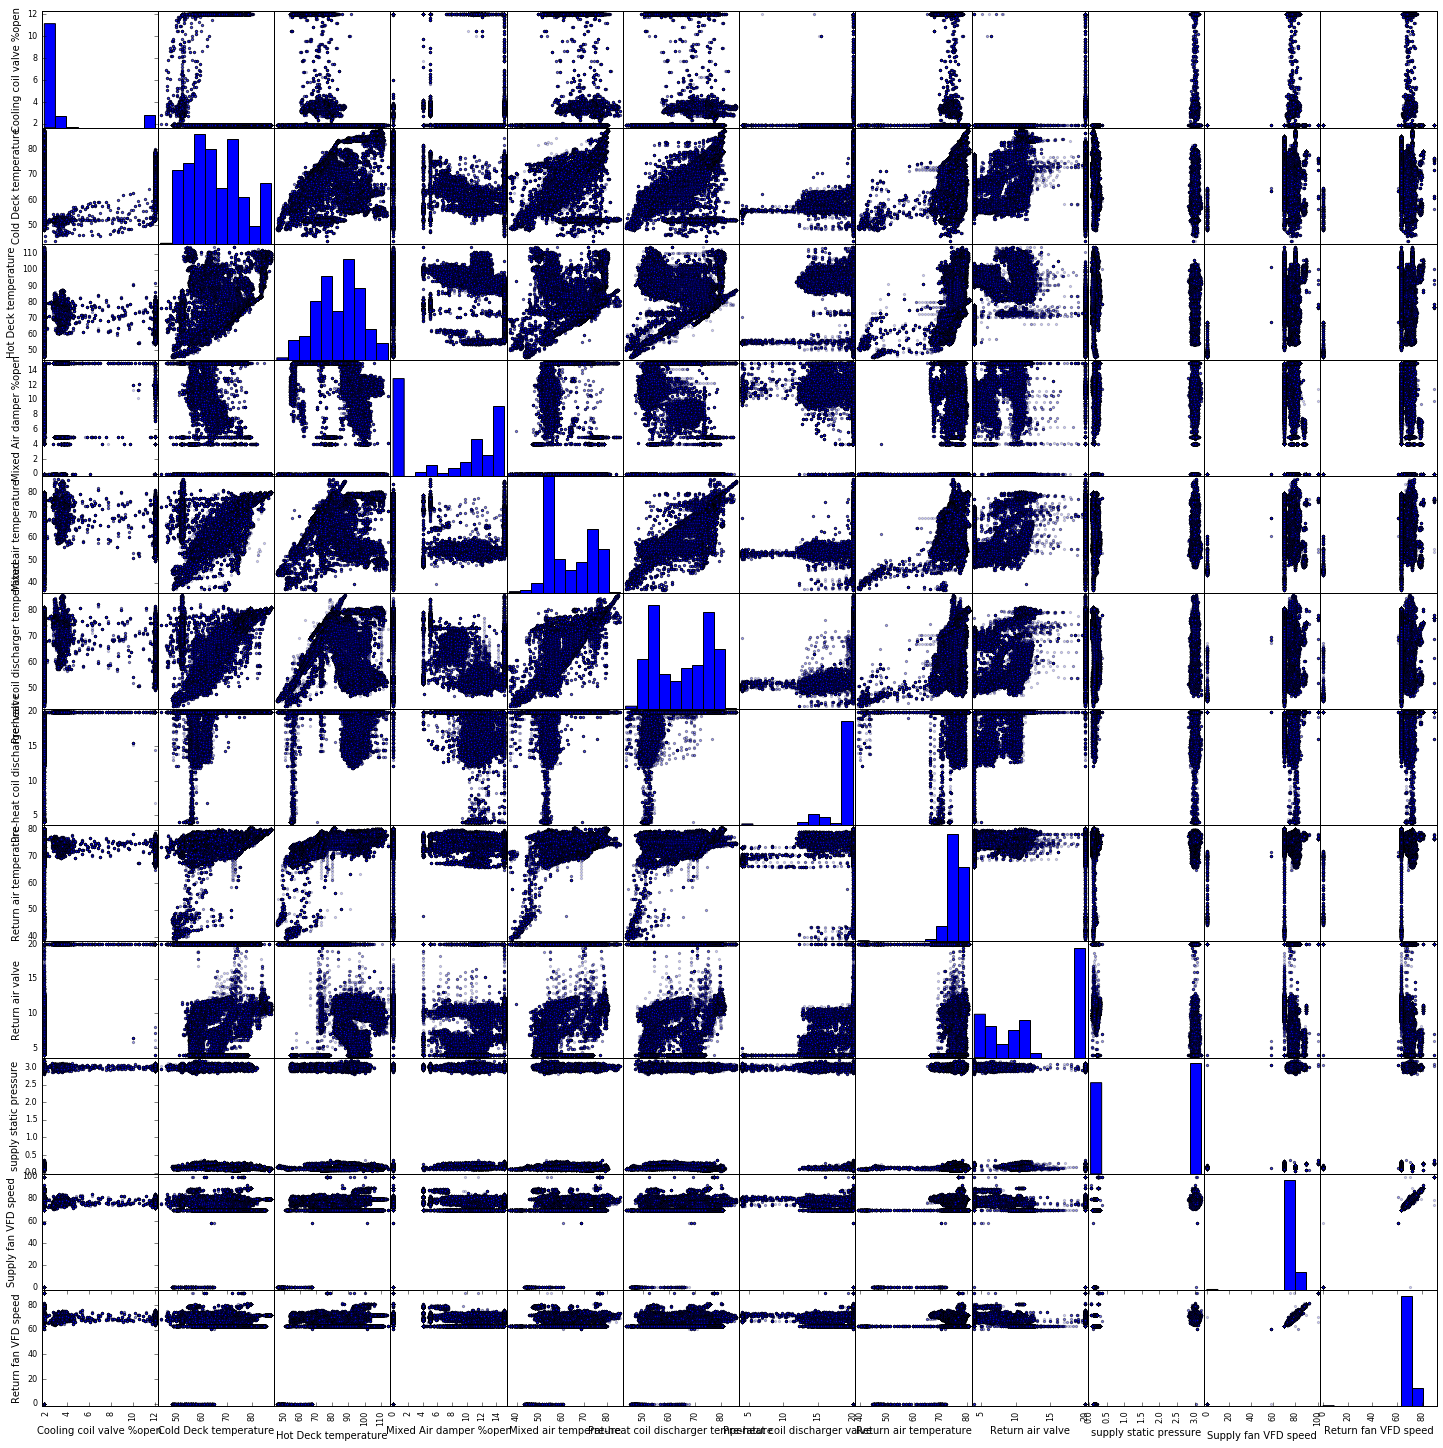

In [13]:
df = pd.scatter_matrix(df1, alpha = 0.2, figsize=(25,25))
plt.savefig(''.join(['bivariate','_ahu_18']))

In [7]:
work = pd.read_excel('C:/Users/MisraSN-PC/Desktop/CSP 572 - Practicum/datasets/work order/keyword_it.xlsx',sheetname = 'TOO COLD')
wo = work[work['Floor']==18]
wo

,Wo Number,Description,Assigned To,Building,Floor,Room,Craft,Enter Date,Wo Close Date,Hours SUM
750,WO122352,ROOM IS TOO COLD,TJABCZYN,IT,18.0,18C9-1,HVAC,2015-01-13 09:48:35,2015-01-14 14:37:09,1.00
924,WO122529,ROOM IS TOO COLD,TARIANOU,IT,18.0,18F4-1,HVAC,2015-01-16 10:54:44,2015-01-16 15:32:41,0.75
4579,WO126183,ROOM IS TOO COLD,TJABCZYN,IT,18.0,18E4-1,HVAC,2015-04-02 11:37:40,2015-04-03 14:30:12,2.00
4600,WO126205,ROOM IS TOO COLD - 18E4-1,DBROOKS4,IT,18.0,18E4-1,HVAC,2015-04-02 15:00:17,2015-04-03 13:33:07,0.50
4718,WO126322,ROOM IS TOO COLD,TJABCZYN,IT,18.0,18E4-1,HVAC,2015-04-06 09:49:47,2015-04-08 15:01:49,0.50
5392,WO126995,ROOM IS TOO COLD,TJABCZYN,IT,18.0,18D3-2,HVAC,2015-04-21 08:51:55,2015-04-22 14:40:14,1.00
5400,WO127004,ROOM IS TOO COLD,TJABCZYN,IT,18.0,18C7-1,HVAC,2015-04-21 09:26:50,2015-04-22 14:44:26,1.00
6427,WO128034,ROOM IS TOO COLD,TJABCZYN,IT,18.0,18F8-1,HVAC,2015-05-12 09:57:35,2015-06-01 15:06:57,1.00
6433,WO128038,ROOM IS TOO COLD - 18E4-1,TJABCZYN,IT,18.0,18E4-1,HVAC,2015-05-12 10:43:16,2015-05-29 14:56:37,0.50
6647,WO128240,ROOM IS TOO COLD,TJABCZYN,IT,18.0,18E4-1,HVAC,2015-05-18 10:24:11,2015-05-29 14:55:14,0.50


In [8]:
s = pd.DatetimeIndex(wo['Wo Close Date'])
wo['Date'] = s.date
wo['Time'] = s.time
wo

C:\Users\MisraSN-PC\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\MisraSN-PC\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Wo Number,Description,Assigned To,Building,Floor,Room,Craft,Enter Date,Wo Close Date,Hours SUM,Date,Time
750,WO122352,ROOM IS TOO COLD,TJABCZYN,IT,18.0,18C9-1,HVAC,2015-01-13 09:48:35,2015-01-14 14:37:09,1.00,2015-01-14,14:37:09
924,WO122529,ROOM IS TOO COLD,TARIANOU,IT,18.0,18F4-1,HVAC,2015-01-16 10:54:44,2015-01-16 15:32:41,0.75,2015-01-16,15:32:41
4579,WO126183,ROOM IS TOO COLD,TJABCZYN,IT,18.0,18E4-1,HVAC,2015-04-02 11:37:40,2015-04-03 14:30:12,2.00,2015-04-03,14:30:12
4600,WO126205,ROOM IS TOO COLD - 18E4-1,DBROOKS4,IT,18.0,18E4-1,HVAC,2015-04-02 15:00:17,2015-04-03 13:33:07,0.50,2015-04-03,13:33:07
4718,WO126322,ROOM IS TOO COLD,TJABCZYN,IT,18.0,18E4-1,HVAC,2015-04-06 09:49:47,2015-04-08 15:01:49,0.50,2015-04-08,15:01:49
5392,WO126995,ROOM IS TOO COLD,TJABCZYN,IT,18.0,18D3-2,HVAC,2015-04-21 08:51:55,2015-04-22 14:40:14,1.00,2015-04-22,14:40:14
5400,WO127004,ROOM IS TOO COLD,TJABCZYN,IT,18.0,18C7-1,HVAC,2015-04-21 09:26:50,2015-04-22 14:44:26,1.00,2015-04-22,14:44:26
6427,WO128034,ROOM IS TOO COLD,TJABCZYN,IT,18.0,18F8-1,HVAC,2015-05-12 09:57:35,2015-06-01 15:06:57,1.00,2015-06-01,15:06:57
6433,WO128038,ROOM IS TOO COLD - 18E4-1,TJABCZYN,IT,18.0,18E4-1,HVAC,2015-05-12 10:43:16,2015-05-29 14:56:37,0.50,2015-05-29,14:56:37
6647,WO128240,ROOM IS TOO COLD,TJABCZYN,IT,18.0,18E4-1,HVAC,2015-05-18 10:24:11,2015-05-29 14:55:14,0.50,2015-05-29,14:55:14


,Date,Time,Supply fan ON?OFF,Cooling coil valve %open,Cold Deck temperature,exhaust fans ON?OFF,Hot Deck temperature,Mixed Air damper %open,Mixed air temperature,Pre-heat coil discharger temperature,Pre-heat coil discharger valve,Return air temperature,Return air valve,supply static pressure,Supply fan VFD speed,Return fan VFD speed,datetime,Q,diff
18034,2016-01-15,00:00:00,ON,1.9,83.5,No Data,90.4,0.0,78.2,79.1,20.0,78.2,12.5,0.15,70.0,63.0,2016-01-15 00:00:00,0.026605,0.9
18035,2016-01-15,00:01:57,ON,1.9,83.5,No Data,90.4,0.0,78.2,79.1,20.0,78.2,12.5,0.15,70.0,63.0,2016-01-15 00:01:57,0.026605,0.9
18036,2016-01-15,00:02:36,ON,1.9,83.5,No Data,90.4,0.0,78.2,79.1,20.0,78.2,12.5,0.15,70.0,63.0,2016-01-15 00:02:36,0.026605,0.9
18037,2016-01-15,00:02:52,ON,1.9,83.5,No Data,90.4,0.0,78.2,79.1,20.0,78.2,12.5,0.15,70.0,63.0,2016-01-15 00:02:52,0.026605,0.9
18038,2016-01-15,00:03:21,ON,1.9,83.5,No Data,90.4,0.0,78.2,79.1,20.0,78.2,12.5,0.15,70.0,63.0,2016-01-15 00:03:21,0.026605,0.9


In [19]:
ahu18['datetime'] = pd.to_datetime(ahu18['Date'])+pd.to_timedelta(ahu18['Time'])
ahu18['Q'] = ahu18['Supply fan VFD speed']*(abs(ahu18['Pre-heat coil discharger temperature']-ahu18['Mixed air temperature']))
ahu18['diff'] = abs(ahu18['Pre-heat coil discharger temperature']-ahu18['Mixed air temperature'])
import datetime
ahu18['Date'] = pd.DatetimeIndex(ahu18['Date'])
wo_3 = ahu18[(ahu18['Date']<='2016-04-27')& (ahu18['Date']>='2016-04-20')]
wo_2 = ahu18[(ahu18['Date']<='2016-02-16')& (ahu18['Date']>='2016-02-09')]
wo_1 = ahu18[(ahu18['Date']<='2016-01-22')& (ahu18['Date']>='2016-01-15')]
wo_1.head()

,Date,Time,Supply fan ON?OFF,Cooling coil valve %open,Cold Deck temperature,exhaust fans ON?OFF,Hot Deck temperature,Mixed Air damper %open,Mixed air temperature,Pre-heat coil discharger temperature,Pre-heat coil discharger valve,Return air temperature,Return air valve,supply static pressure,Supply fan VFD speed,Return fan VFD speed,datetime,Q,diff
18034,2016-01-15,00:00:00,ON,1.9,83.5,No Data,90.4,0.0,78.2,79.1,20.0,78.2,12.5,0.15,70.0,63.0,2016-01-15 00:00:00,63.0,0.9
18035,2016-01-15,00:01:57,ON,1.9,83.5,No Data,90.4,0.0,78.2,79.1,20.0,78.2,12.5,0.15,70.0,63.0,2016-01-15 00:01:57,63.0,0.9
18036,2016-01-15,00:02:36,ON,1.9,83.5,No Data,90.4,0.0,78.2,79.1,20.0,78.2,12.5,0.15,70.0,63.0,2016-01-15 00:02:36,63.0,0.9
18037,2016-01-15,00:02:52,ON,1.9,83.5,No Data,90.4,0.0,78.2,79.1,20.0,78.2,12.5,0.15,70.0,63.0,2016-01-15 00:02:52,63.0,0.9
18038,2016-01-15,00:03:21,ON,1.9,83.5,No Data,90.4,0.0,78.2,79.1,20.0,78.2,12.5,0.15,70.0,63.0,2016-01-15 00:03:21,63.0,0.9


In [20]:
#normalise Q
ahu18['Q'] = ahu18['Q']/(max(ahu18['Q']))
ahu18.head()

,Date,Time,Supply fan ON?OFF,Cooling coil valve %open,Cold Deck temperature,exhaust fans ON?OFF,Hot Deck temperature,Mixed Air damper %open,Mixed air temperature,Pre-heat coil discharger temperature,Pre-heat coil discharger valve,Return air temperature,Return air valve,supply static pressure,Supply fan VFD speed,Return fan VFD speed,datetime,Q,diff
0,2015-12-31,00:00:00,OFF,1.9,73.2,OFF,73.4,0.0,71.3,73.6,20.0,75.3,20.0,0.09,70.0,63.0,2015-12-31 00:00:00,0.06799,2.3
1,2015-12-31,00:02:42,OFF,1.9,73.2,OFF,73.4,0.0,71.3,73.6,20.0,75.3,20.0,0.09,70.0,63.0,2015-12-31 00:02:42,0.06799,2.3
2,2015-12-31,00:03:20,OFF,1.9,73.2,OFF,73.4,0.0,71.3,73.6,20.0,75.3,20.0,0.09,70.0,63.0,2015-12-31 00:03:20,0.06799,2.3
3,2015-12-31,00:03:36,OFF,1.9,73.2,OFF,73.4,0.0,71.3,73.6,20.0,75.3,20.0,0.09,70.0,63.0,2015-12-31 00:03:36,0.06799,2.3
4,2015-12-31,00:04:05,OFF,1.9,73.2,OFF,73.4,0.0,71.3,73.6,20.0,75.3,20.0,0.09,70.0,63.0,2015-12-31 00:04:05,0.06799,2.3


In [30]:
def graph1(date, columnname):
    date = [date]
    y = [columnname]
    fig = plt.figure()
    plt.plot_date(date,y)
    plt.grid(True)
    plt.gcf().autofmt_xdate()
    #plt.plot_date(dates, [ahu18['Cooling coil valve %open']])
    plt.savefig(''.join([columnname, ' vs ' , date]))

TypeError: sequence item 0: expected string, Series found

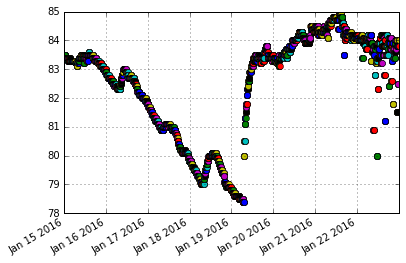

In [31]:
graph1(wo_1['datetime'], wo_1['Cold Deck temperature'])

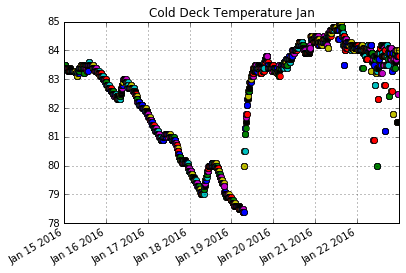

In [29]:
import plotly.plotly as py
import plotly.graph_objs as go
date = [wo_1['datetime']]
y = [wo_1['Cold Deck temperature']]
fig = plt.figure()
plt.plot_date(date,y)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.title('Cold Deck Temperature Jan')
#plt.plot_date(dates, [ahu18['Cooling coil valve %open']])
plt.savefig(''.join(['datetime',' vs ','Cold Deck temperature','_1']))
#plt.show()

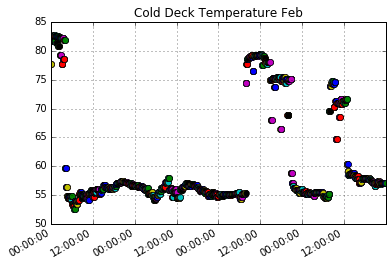

In [30]:
date = [wo_2['datetime']]
y = [wo_2['Cold Deck temperature']]
fig = plt.figure()
plt.plot_date(date,y)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.title('Cold Deck Temperature Feb')
#plt.plot_date(dates, [ahu18['Cooling coil valve %open']])
plt.savefig(''.join(['datetime',' vs ','Cold Deck temperature','_2']))
#plt.show()

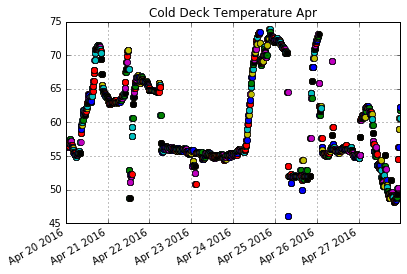

In [31]:
date = [wo_3['datetime']]
y = [wo_3['Cold Deck temperature']]
fig = plt.figure()
plt.plot_date(date,y)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.title('Cold Deck Temperature Apr')
#plt.plot_date(dates, [ahu18['Cooling coil valve %open']])
plt.savefig(''.join(['datetime',' vs ','Cold Deck temperature','_3']))
plt.show()

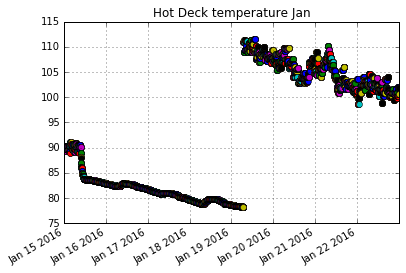

In [32]:
date = [wo_1['datetime']]
y1= [wo_1['Hot Deck temperature']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.title('Hot Deck temperature Jan')
plt.savefig(''.join(['datetime',' vs ','Hot Deck temperature','_1']))
plt.show()

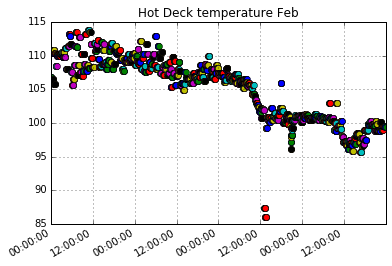

In [33]:
date = [wo_2['datetime']]
y1= [wo_2['Hot Deck temperature']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.title('Hot Deck temperature Feb')
plt.savefig(''.join(['datetime',' vs ','Hot Deck temperature','_2']))
plt.show()

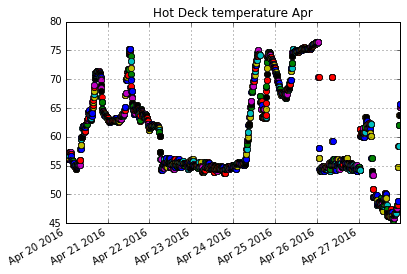

In [34]:
date = [wo_3['datetime']]
y1= [wo_3['Hot Deck temperature']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.title('Hot Deck temperature Apr')
plt.savefig(''.join(['datetime',' vs ','Hot Deck temperature','_3']))
plt.show()

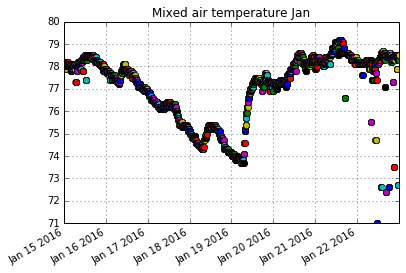

In [35]:
date = [wo_1['datetime']]
y1= [wo_1['Mixed air temperature']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.title('Mixed air temperature Jan')
plt.savefig(''.join(['datetime',' vs ','Mixed air temperature','_1']))
plt.show()

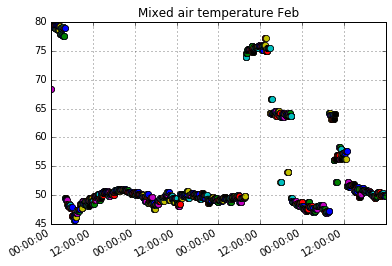

In [38]:
date = [wo_2['datetime']]
y1= [wo_2['Mixed air temperature']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.title('Mixed air temperature Feb')
plt.savefig(''.join(['datetime',' vs ','Mixed air temperature','_2']))
plt.show()

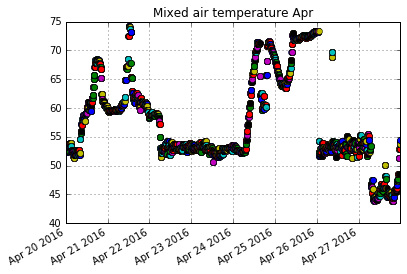

In [39]:
date = [wo_3['datetime']]
y1= [wo_3['Mixed air temperature']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.title('Mixed air temperature Apr')
plt.savefig(''.join(['datetime',' vs ','Mixed air temperature','_3']))
plt.show()

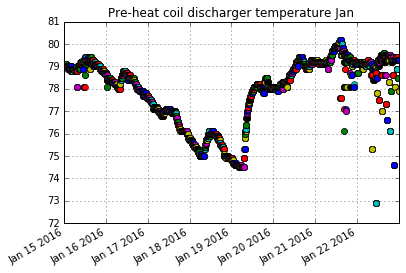

In [40]:
date = [wo_1['datetime']]
y1= [wo_1['Pre-heat coil discharger temperature']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.title('Pre-heat coil discharger temperature Jan')
plt.savefig(''.join(['datetime',' vs ','Pre-heat coil discharger temperature','_1']))
plt.show()

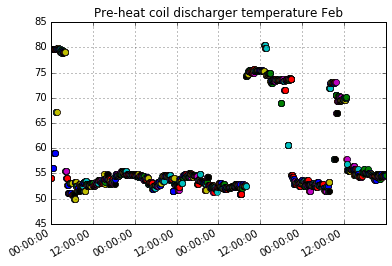

In [41]:
date = [wo_2['datetime']]
y1= [wo_2['Pre-heat coil discharger temperature']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.title('Pre-heat coil discharger temperature Feb')
plt.savefig(''.join(['datetime',' vs ','Pre-heat coil discharger temperature','_2']))
plt.show()

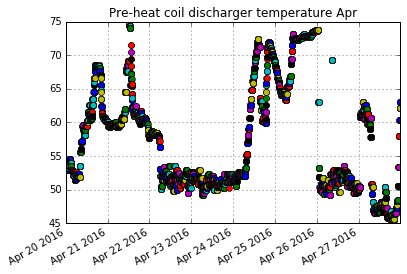

In [42]:
date = [wo_3['datetime']]
y1= [wo_3['Pre-heat coil discharger temperature']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.title('Pre-heat coil discharger temperature Apr')
plt.savefig(''.join(['datetime',' vs ','Pre-heat coil discharger temperature','_3']))
plt.show()

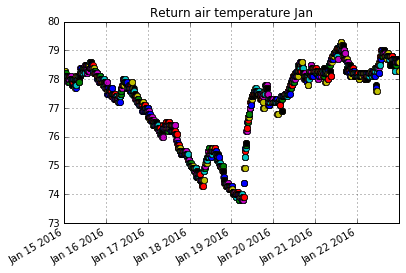

In [43]:
date = [wo_1['datetime']]
y1= [wo_1['Return air temperature']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.title('Return air temperature Jan')
plt.savefig(''.join(['datetime',' vs ','Return air temperature','_1']))
plt.show()

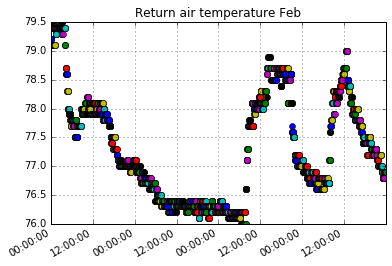

In [44]:
date = [wo_2['datetime']]
y1= [wo_2['Return air temperature']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.title('Return air temperature Feb')
plt.savefig(''.join(['datetime',' vs ','Return air temperature','_2']))
plt.show()

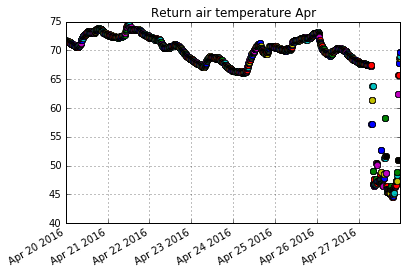

In [45]:
date = [wo_3['datetime']]
y1= [wo_3['Return air temperature']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.title('Return air temperature Apr')
plt.savefig(''.join(['datetime',' vs ','Return air temperature','_3']))
plt.show()

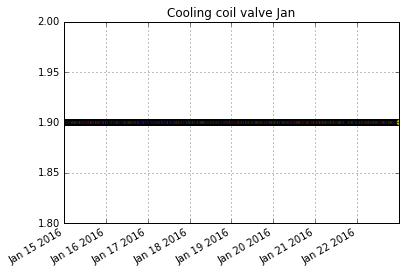

In [46]:
date = [wo_1['datetime']]
y1= [wo_1['Cooling coil valve %open']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.title('Cooling coil valve Jan')
plt.savefig(''.join(['datetime',' vs ','Cooling coil valve','_1']))
plt.show()

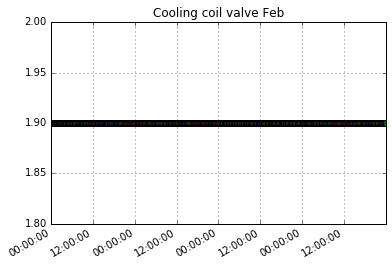

In [47]:
date = [wo_2['datetime']]
y1= [wo_2['Cooling coil valve %open']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.title('Cooling coil valve Feb')
plt.savefig(''.join(['datetime',' vs ','Cooling coil valve','_2']))
plt.show()

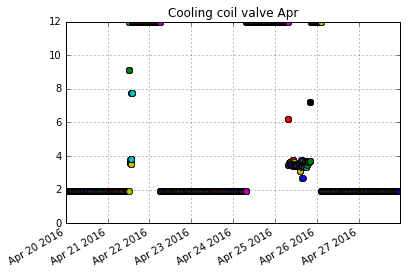

In [48]:
date = [wo_3['datetime']]
y1= [wo_3['Cooling coil valve %open']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.title('Cooling coil valve Apr')
plt.savefig(''.join(['datetime',' vs ','Cooling coil valve','_3']))
plt.show()

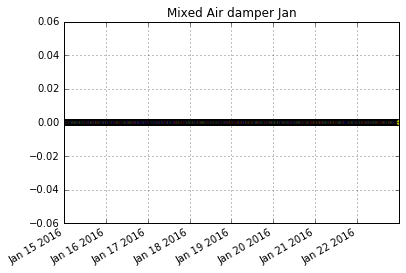

In [49]:
date = [wo_1['datetime']]
y1= [wo_1['Mixed Air damper %open']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.title('Mixed Air damper Jan')
plt.savefig(''.join(['datetime',' vs ','Mixed Air damper','_1']))
plt.show()

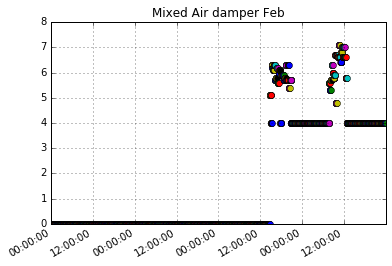

In [50]:
date = [wo_2['datetime']]
y1= [wo_2['Mixed Air damper %open']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.title('Mixed Air damper Feb')
plt.savefig(''.join(['datetime',' vs ','Mixed Air damper','_2']))
plt.show()

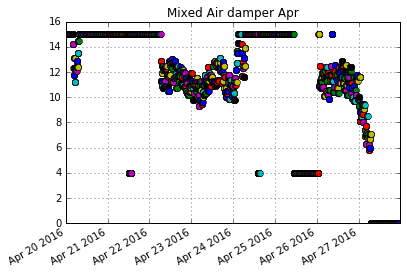

In [51]:
date = [wo_3['datetime']]
y1= [wo_3['Mixed Air damper %open']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.title('Mixed Air damper Apr')
plt.savefig(''.join(['datetime',' vs ','Mixed Air damper','_3']))
plt.show()

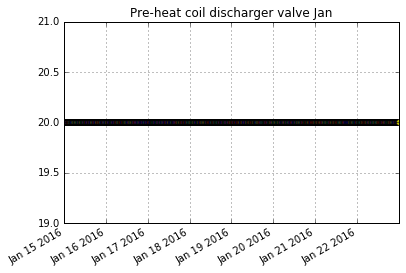

In [52]:
date = [wo_1['datetime']]
y1= [wo_1['Pre-heat coil discharger valve']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.title('Pre-heat coil discharger valve Jan')
plt.savefig(''.join(['datetime',' vs ','Pre-heat coil discharger valve','_1']))
plt.show()

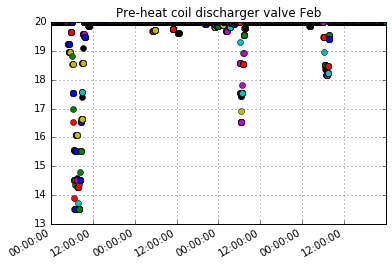

In [53]:
date = [wo_2['datetime']]
y1= [wo_2['Pre-heat coil discharger valve']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.title('Pre-heat coil discharger valve Feb')
plt.savefig(''.join(['datetime',' vs ','Pre-heat coil discharger valve','_2']))
plt.show()

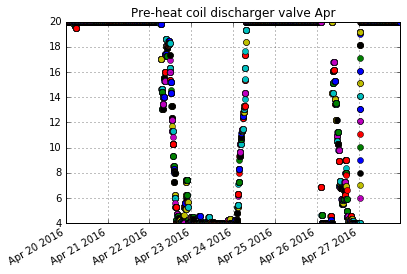

In [54]:
date = [wo_3['datetime']]
y1= [wo_3['Pre-heat coil discharger valve']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.title('Pre-heat coil discharger valve Apr')
plt.savefig(''.join(['datetime',' vs ','Pre-heat coil discharger valve','_3']))
plt.show()

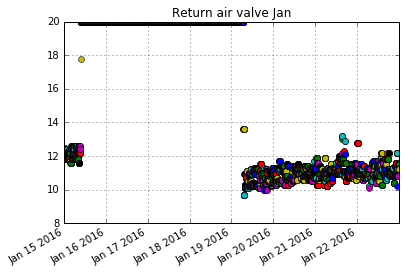

In [55]:
date = [wo_1['datetime']]
y1= [wo_1['Return air valve']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.title('Return air valve Jan')
plt.savefig(''.join(['datetime',' vs ','Return air valve','_1']))
plt.show()

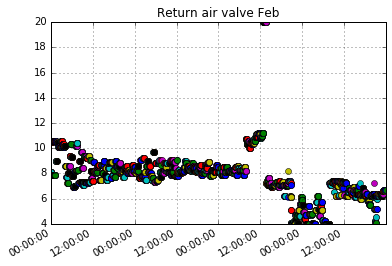

In [56]:
date = [wo_2['datetime']]
y1= [wo_2['Return air valve']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.title('Return air valve Feb')
plt.savefig(''.join(['datetime',' vs ','Return air valve','_2']))
plt.show()

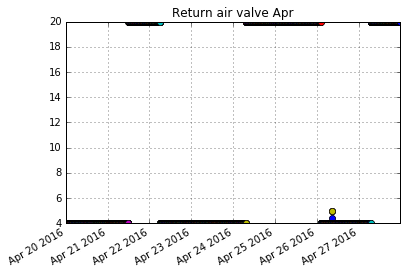

In [57]:
date = [wo_3['datetime']]
y1= [wo_3['Return air valve']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.title('Return air valve Apr')
plt.savefig(''.join(['datetime',' vs ','Return air valve','_3']))
plt.show()

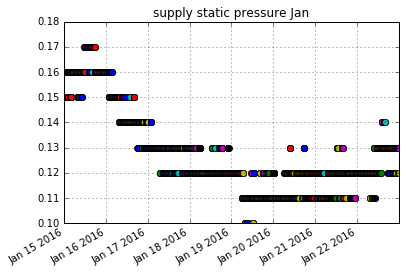

In [58]:
date = [wo_1['datetime']]
y1= [wo_1['supply static pressure']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.title('supply static pressure Jan')
plt.savefig(''.join(['datetime',' vs ','supply static pressure','_1']))
plt.show()

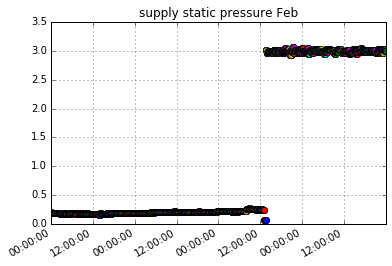

In [59]:
date = [wo_2['datetime']]
y1= [wo_2['supply static pressure']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.title('supply static pressure Feb')
plt.savefig(''.join(['datetime',' vs ','supply static pressure','_2']))
plt.show()

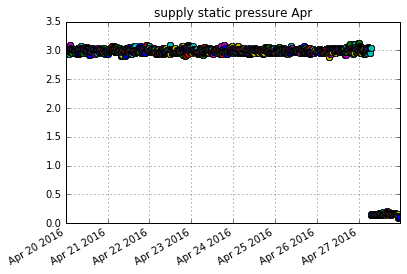

In [60]:
date = [wo_3['datetime']]
y1= [wo_3['supply static pressure']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.title('supply static pressure Apr')
plt.savefig(''.join(['datetime',' vs ','supply static pressure','_3']))
plt.show()

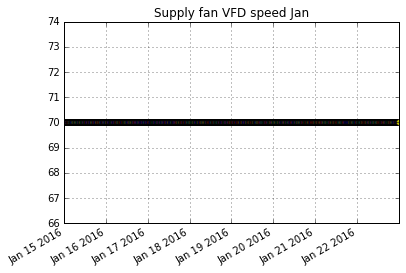

In [61]:
date = [wo_1['datetime']]
y1= [wo_1['Supply fan VFD speed']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.title('Supply fan VFD speed Jan')
plt.savefig(''.join(['datetime',' vs ','Supply fan VFD speed','_1']))
plt.show()

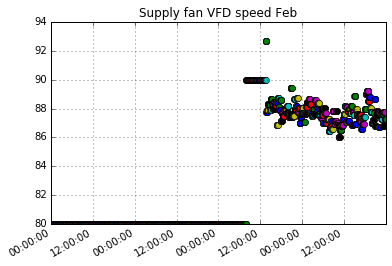

In [62]:
date = [wo_2['datetime']]
y1= [wo_2['Supply fan VFD speed']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.title('Supply fan VFD speed Feb')
plt.savefig(''.join(['datetime',' vs ','Supply fan VFD speed','_2']))
plt.show()

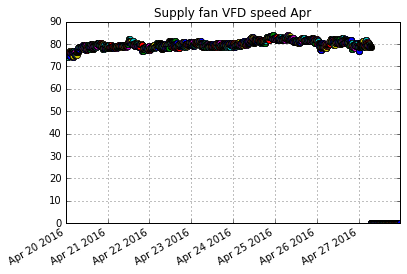

In [63]:
date = [wo_3['datetime']]
y1= [wo_3['Supply fan VFD speed']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.title('Supply fan VFD speed Apr')
plt.savefig(''.join(['datetime',' vs ','Supply fan VFD speed','_3']))
plt.show()

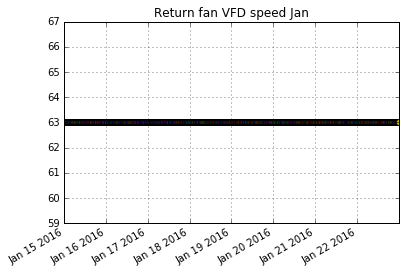

In [64]:
date = [wo_1['datetime']]
y1= [wo_1['Return fan VFD speed']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.title('Return fan VFD speed Jan')
plt.savefig(''.join(['datetime',' vs ','Return fan VFD speed','_1']))
plt.show()

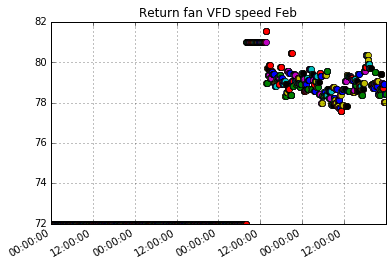

In [65]:
date = [wo_2['datetime']]
y1= [wo_2['Return fan VFD speed']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.title('Return fan VFD speed Feb')
plt.savefig(''.join(['datetime',' vs ','Return fan VFD speed','_2']))
plt.show()

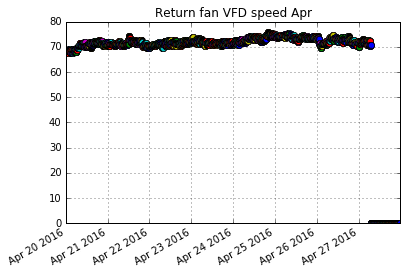

In [66]:
date = [wo_3['datetime']]
y1= [wo_3['Return fan VFD speed']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.title('Return fan VFD speed Apr')
plt.savefig(''.join(['datetime',' vs ','Return fan VFD speed','_3']))
plt.show()

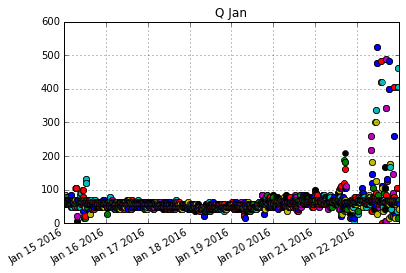

In [67]:
date = [wo_1['datetime']]
y1= [wo_1['Q']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.title('Q Jan')
plt.savefig(''.join(['datetime',' vs ','Q','_1']))
plt.show()

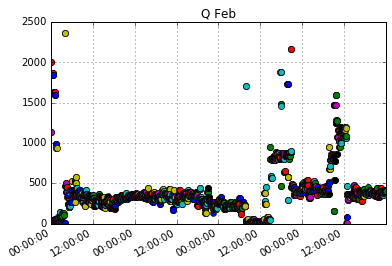

In [68]:
date = [wo_2['datetime']]
y1= [wo_2['Q']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.title('Q Feb')
plt.savefig(''.join(['datetime',' vs ','Q','_2']))
plt.show()

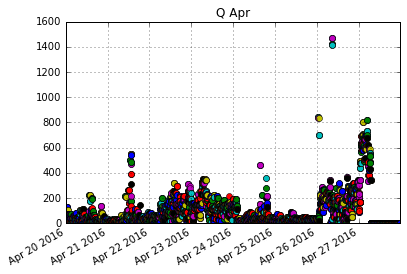

In [69]:
date = [wo_3['datetime']]
y1= [wo_3['Q']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.title('Q Apr')
plt.savefig(''.join(['datetime',' vs ','Q','_3']))
plt.show()

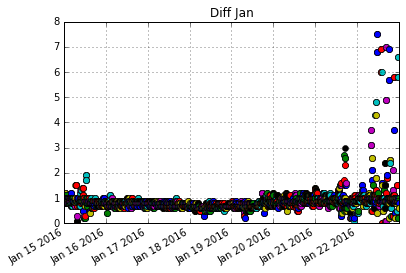

In [70]:
date = [wo_1['datetime']]
y1= [wo_1['diff']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.title('Diff Jan')
plt.savefig(''.join(['datetime',' vs ','diff','_1']))
plt.show()

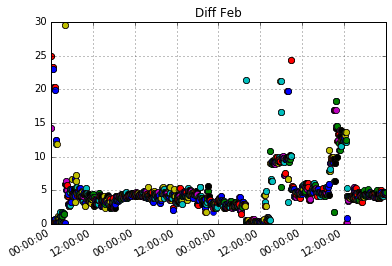

In [71]:
date = [wo_2['datetime']]
y1= [wo_2['diff']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.title('Diff Feb')
plt.savefig(''.join(['datetime',' vs ','diff','_2']))
plt.show()

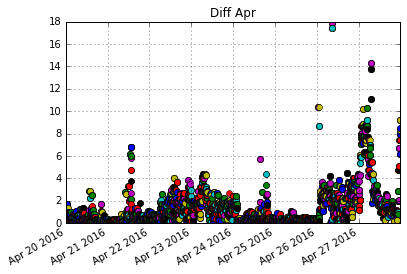

In [72]:
date = [wo_3['datetime']]
y1= [wo_3['diff']]
plt.plot_date(date,y1)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.title('Diff Apr')
plt.savefig(''.join(['datetime',' vs ','diff','_3']))
plt.show()

In [ ]:
# 3 days when there is no wo and 3 days when there is